In [ ]:
# Install packages
# %pip install networkx
# %pip install numpy
# %pip install tqdm
# %pip install matplotlib

In [1]:
# The starter code is short and simple, take a look!
from starter import *
from physics_misc import *
import random

<IPython.core.display.Javascript object>

# Phase 1 - Create Inputs

In [ ]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

def np_int32_to_int(G: nx.Graph):
    for u, v, d in G.edges(data=True):
        d['weight'] = int(d['weight'])

def random_generate(G: nx.Graph):
    edges = []
    for u in range(G.number_of_nodes()):
        for v in range(u + 1, G.number_of_nodes()):
            edges.append((u, v))
    random.shuffle(edges)
    for u, v in edges[:min(MAX_EDGES, len(edges))]:
        if u == v:
            continue
        G.add_edge(u, v, weight=random.randint(1, MAX_WEIGHT))
    while sum(d for u, v, d in G.edges(data='weight')) < MIN_NET_WEIGHT:
        u, v = random.randint(0, G.number_of_nodes() - 1), random.randint(0, G.number_of_nodes() - 1)
        if u == v:
            continue
        G.add_edge(u, v, weight=random.randint(1, MAX_WEIGHT))
    np_int32_to_int(G)

def small(G: nx.Graph):
    random_generate(G)

def medium(G: nx.Graph):
    random_generate(G)

def large(G: nx.Graph):
    random_generate(G)

def hw11_6c(dim = 4):
    G = nx.empty_graph(dim * dim)
    for i in range(dim):
        for j in range(dim):
            if i > 0:
                G.add_edge(i * dim + j, (i - 1) * dim + j, weight=1)
            if j > 0:
                G.add_edge(i * dim + j, i * dim + j - 1, weight=1)
    np_int32_to_int(G)
    return G

In [ ]:
G = nx.empty_graph(N_SMALL)
small(G)
write_input(G, '../tests/small/random/')

G = nx.empty_graph(N_MEDIUM)
medium(G)
write_input(G, '../tests/medium/random/')

G = nx.empty_graph(N_LARGE)
large(G)
write_input(G, '../tests/large/random/')

# Phase 2 - Implement your Solver

In [2]:
def copy_teams(G: nx.Graph, G_copy: nx.Graph):
    for v in G:
        G.nodes[v]['team'] = G_copy.nodes[v]['team']

def random_solve(G: nx.Graph, team_size = 10):
    for v in G:
        G.nodes[v]['team'] = random.randint(1, random.randint(1, team_size))

def random_sample_solve(G: nx.Graph):
    G_best, best_score = G.copy(), float('inf')
    for _ in range(1000):
        random_solve(G)
        new_score = score(G)
        if new_score < best_score:
            G_best, best_score = G.copy(), new_score
    copy_teams(G, G_best)

def solve(G: nx.Graph):
    physics_solve(G, 5)
    # random_sample_solve(G)

[1, 2, 3, 4, 4, 2, 5, 2, 2, 1, 1, 2, 1, 2, 3, 5, 3, 3, 4, 1, 4, 4, 2, 2, 4, 3, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 4, 2, 1, 3, 2, 1, 5, 5, 3, 2, 4, 5, 5, 4, 5, 3, 5, 4, 1, 1, 3, 4, 1, 3, 5, 2, 3, 2, 1, 2, 4, 3, 1, 5, 5, 2, 4, 4, 4, 2, 1, 1, 1, 2, 4, 3, 1, 1, 2, 1, 1, 2, 3, 1, 3, 5, 3, 4, 5, 2, 4, 4, 3, 1, 4, 1, 1, 2, 3, 1, 1, 3, 4, 1, 5, 5, 2, 5, 1, 5, 1, 3, 1, 2, 1, 1, 4, 4, 3, 4, 1, 4, 5, 3, 5, 5, 2, 3, 2, 3, 2, 5, 1, 1, 3, 1, 1, 1, 5, 4, 1, 4, 4, 2, 1, 4, 1, 3, 3, 1, 5, 5, 3, 4, 1, 2, 1, 4, 1, 3, 2, 1, 2, 5, 2, 1, 1, 1, 5, 4, 1, 2, 3, 5, 4, 4, 3, 2, 2, 1, 5, 2, 2, 3, 5, 2, 5, 2, 4, 4, 1, 4, 5, 1, 3, 4, 4, 1, 3, 1, 5, 2, 1, 1, 1, 2, 1, 3, 4, 1, 4, 4, 1, 1, 5, 3, 4, 2, 3, 4, 1, 1, 4, 1, 1, 3, 3, 3, 2, 4, 5, 2, 1, 1, 4, 3, 5, 2, 1, 4, 4, 5, 5, 4, 2, 3, 2, 2, 1, 5, 2, 5, 4, 3, 1, 2, 4, 4, 1, 2, 5, 5, 1, 4, 1, 5, 5, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 4, 2, 4, 2, 1, 1, 5, 1, 1, 5, 2, 2, 4, 3, 1, 5, 3, 4, 1, 4, 4, 1, 1, 1, 3, 4, 3, 3, 4, 4, 4, 1, 5, 5, 1, 3, 1, 1, 1, 1, 5, 4, 2, 1, 1, 3, 3, 

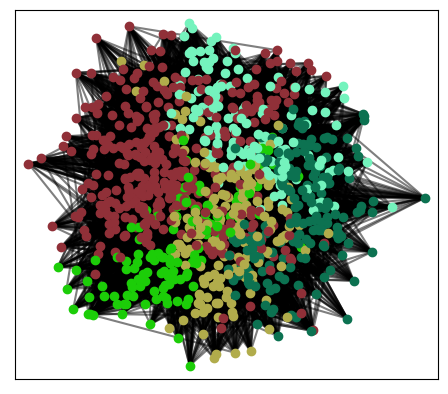

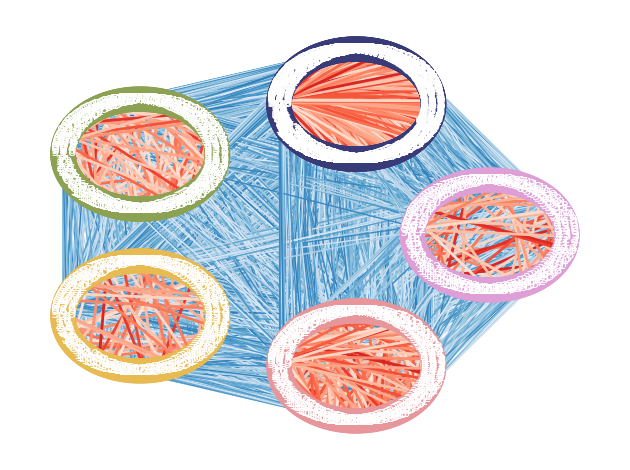

1050809.528529447

In [4]:
IN_FILE = '../tests/large/random_1/'

def score_to_str(score: float):
    return str(round(score))

G = read_input(IN_FILE + 'graph.in')
solve(G)
validate_output(G)
visualize(G,  path=IN_FILE + '{}.png'.format(score_to_str(score(G))))
write_output(G, IN_FILE + '{}.out'.format(score_to_str(score(G))), overwrite=True)
score(G)

In [ ]:
run_all(solve, '../tests/', '../submission/', overwrite=True)
tar('../submission/')

# Custom Visualizer

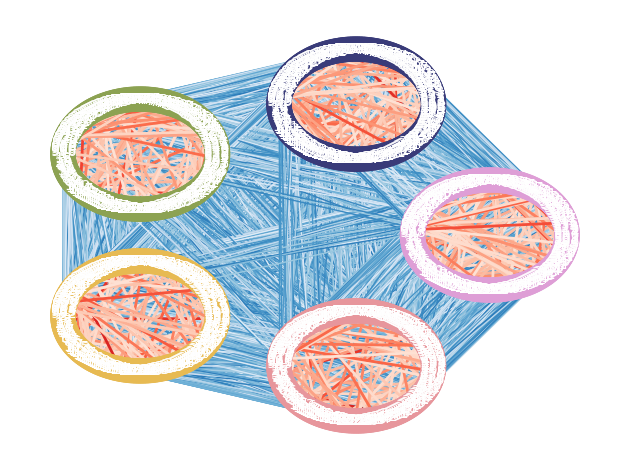

178714.78897503612

In [5]:
SCORE = 178715
TEST = '../tests/large/random_1/'
IN_FILE = TEST + 'graph.in'
OUT_FILE = TEST + '{}.out'.format(SCORE)
G = read_input(IN_FILE)
read_output(G, OUT_FILE)
validate_output(G)
visualize(G, path=TEST + '{}.png'.format(SCORE))
score(G)